In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('train_NIR5Yl1.csv')

In [3]:
data.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [4]:
len(data)

330045

In [5]:
del data['ID']

In [6]:
data.nunique()

Tag               10
Reputation     16527
Answers           63
Username      141802
Views          82137
Upvotes         7239
dtype: int64

In [7]:
data.describe()

,Reputation,Answers,Username,Views,Upvotes
count,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


In [8]:
data.corr()

,Reputation,Answers,Username,Views,Upvotes
Reputation,1.000000,0.066504,-0.041019,0.036455,0.266710
Answers,0.066504,1.000000,-0.012197,0.498642,0.202033
Username,-0.041019,-0.012197,1.000000,0.002306,-0.011970
Views,0.036455,0.498642,0.002306,1.000000,0.437336
Upvotes,0.266710,0.202033,-0.011970,0.437336,1.000000


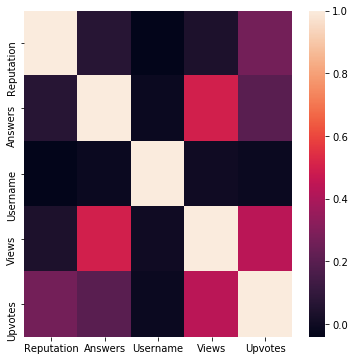

In [9]:
plt.figure(figsize= (6, 6))
sns.heatmap(data.corr())

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 6 columns):
Tag           330045 non-null object
Reputation    330045 non-null float64
Answers       330045 non-null float64
Username      330045 non-null int64
Views         330045 non-null float64
Upvotes       330045 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 15.1+ MB


In [11]:
data.isnull().any()

Tag           False
Reputation    False
Answers       False
Username      False
Views         False
Upvotes       False
dtype: bool

In [12]:
data.columns

Index(['Tag', 'Reputation', 'Answers', 'Username', 'Views', 'Upvotes'], dtype='object')

In [13]:
X = data.iloc[:, :-1].values
y = data.iloc[:, [-1]].values

In [14]:
X

array([['a', 3942.0, 2.0, 155623, 7855.0],
       ['a', 26046.0, 12.0, 21781, 55801.0],
       ['c', 1358.0, 4.0, 56177, 8067.0],
       ...,
       ['c', 6178.0, 2.0, 91701, 2453.0],
       ['j', 89.0, 2.0, 80245, 2107.0],
       ['j', 2001.0, 4.0, 154692, 2554.0]], dtype=object)

In [15]:
y

array([[  42.],
       [1175.],
       [  60.],
       ...,
       [  15.],
       [   3.],
       [  37.]])

In [16]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
LebEn=LabelEncoder()
OneHotEncoder = OneHotEncoder()

In [18]:
X[:,0]=OneHotEncoder.fit_transform(X[:,0].reshape(1,-1)).toarray()

In [19]:
X

array([[1.0, 3942.0, 2.0, 155623, 7855.0],
       [1.0, 26046.0, 12.0, 21781, 55801.0],
       [1.0, 1358.0, 4.0, 56177, 8067.0],
       ...,
       [1.0, 6178.0, 2.0, 91701, 2453.0],
       [1.0, 89.0, 2.0, 80245, 2107.0],
       [1.0, 2001.0, 4.0, 154692, 2554.0]], dtype=object)

In [20]:
X.shape , y.shape

((330045, 5), (330045, 1))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ssc = StandardScaler()

In [25]:
Xtrain = ssc.fit_transform(Xtrain)

In [26]:
Xtest = ssc.transform(Xtest)

In [27]:
Xtrain

array([[ 0.        ,  0.57067407, -0.25567703, -1.61805952, -0.05411783],
       [ 0.        , -0.21880315, -0.53464935,  0.1003917 , -0.27662904],
       [ 0.        , -0.2611486 , -0.53464935, -0.77749682,  0.0492282 ],
       ...,
       [ 0.        ,  0.86255527,  0.86021225, -0.24407922, -0.33072586],
       [ 0.        , -0.26885784, -0.25567703,  1.1501294 ,  0.08192192],
       [ 0.        , -0.25852968,  0.30226761,  1.40738477,  0.36432253]])

In [28]:
Xtest

array([[ 0.        , -0.28549355, -0.25567703, -0.23279609, -0.29603173],
       [ 0.        , -0.26800945,  1.97610152,  0.78325487,  0.13281564],
       [ 0.        , -0.27376371, -0.25567703, -1.37906046,  0.14537032],
       ...,
       [ 0.        , -0.27088658, -0.53464935, -0.57210319, -0.36264642],
       [ 0.        , -0.10692703, -0.25567703, -0.37461792, -0.19202299],
       [ 0.        , -0.19814682,  1.13918457,  1.18147821,  0.55768674]])

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
ypred=lr.predict(Xtest)

In [33]:
ypred

array([[-344.15825722],
       [  -4.89878694],
       [ 393.79605611],
       ...,
       [-389.93043416],
       [ -20.49619548],
       [ 865.9035622 ]])

In [34]:
from sklearn.metrics import r2_score

In [35]:
r2_score(ytest,ypred)

0.2345146862781773

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
GBR = GradientBoostingRegressor(n_estimators=100)

In [38]:
GBR.fit(Xtrain,ytrain)

/home/shubham/.local/lib/python3.6/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
ypred1=GBR.predict(Xtest)

In [40]:
r2_score(ytest,ypred1)

0.8896142706710249

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
from sklearn.ensemble import RandomForestRegressor
des = RandomForestRegressor()

In [43]:
parameters={'n_estimators':[5,10,20,35,50],'criterion':['mse','mae'],}

In [44]:
model=GridSearchCV(des,parameters)

In [45]:
#model.fit(Xtrain,ytrain)

In [46]:
#ypred2=model.predict(Xtest)

In [47]:
#r2_score(ytest,ypred2)

In [48]:
data2 = pd.read_csv("test_8i3B3FC.csv")

In [49]:
data2.head()

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0


In [50]:
data2.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
dtype: int64

In [52]:
del data2['ID']

In [53]:
Z = data2.values

In [54]:
Z

array([['a', 5645.0, 3.0, 50652, 33200.0],
       ['c', 24511.0, 6.0, 37685, 2730.0],
       ['i', 927.0, 1.0, 135293, 21167.0],
       ...,
       ['p', 435.0, 5.0, 119788, 57048.0],
       ['o', 176.0, 3.0, 86824, 10193.0],
       ['a', 648.0, 2.0, 102240, 12785.0]], dtype=object)

In [55]:
Z[:,0] = OneHotEncoder.fit_transform(Z[:,0].reshape(1,-1)).toarray()

In [56]:
Z

array([[1.0, 5645.0, 3.0, 50652, 33200.0],
       [1.0, 24511.0, 6.0, 37685, 2730.0],
       [1.0, 927.0, 1.0, 135293, 21167.0],
       ...,
       [1.0, 435.0, 5.0, 119788, 57048.0],
       [1.0, 176.0, 3.0, 86824, 10193.0],
       [1.0, 648.0, 2.0, 102240, 12785.0]], dtype=object)

In [57]:
ypred1=GBR.predict(Z)

In [58]:
ypred1

array([584449.96022408, 603120.83275933, 566565.28510597, ...,
       603120.83275933, 584449.96022408, 575087.00020703])

In [59]:
data3 = pd.read_csv("test_8i3B3FC.csv")

In [60]:
del data3['Tag'], data3['Reputation'], data3['Username'], data3['Views'], data3['Answers']

In [61]:
data3

,ID
0,366953
1,71864
2,141692
3,316833
4,440445
...,...
141443,47187
141444,329126
141445,282334
141446,386629


In [62]:
data3.insert(1, 'Upvotes', ypred1)

In [63]:
data3

,ID,Upvotes
0,366953,584449.960224
1,71864,603120.832759
2,141692,566565.285106
3,316833,603434.551165
4,440445,587792.018084
...,...,...
141443,47187,603120.832759
141444,329126,584449.960224
141445,282334,603120.832759
141446,386629,584449.960224


In [64]:
data3.to_csv('result_submission.csv')